In [1]:
import numpy as np
from matplotlib import pyplot as plt
from SERSGenerator import SERSGenerator, pseudo_voigt

from sklearn.decomposition import PCA
from matplotlib.ticker import MultipleLocator

import seaborn as sns
sns.set_style("whitegrid")

# PCA on mutliple maps

In [2]:
N = 100
Xs = np.zeros((400*N, 500))
gens = []
for i in range(N):
    gen = SERSGenerator(mapsize=(20,20), Nw=500, seed=i, eta=0)
    X = gen.generate(N_hotspots=2, K=1, sig=0.1, sbr=1, plot=False, background='none')
    Xs[i*400:(i+1)*400, :] = X
    gens.append(gen)

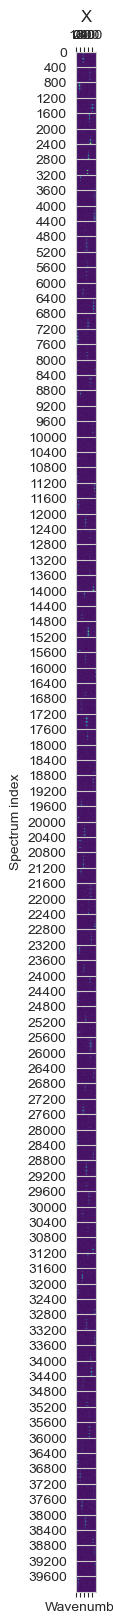

In [3]:
# Dataset Matrix
fig, ax = plt.subplots(1,1, figsize=(10,20))

mappable = ax.matshow(Xs, cmap='viridis')
ax.set_xlabel('Wavenumber')
ax.set_ylabel('Spectrum index')
ax.set_title('X')
ax.yaxis.set_major_locator(MultipleLocator(400))
ax.grid(which='major', axis='x')
#plt.colorbar(mappable=mappable, ax=ax)
plt.show()

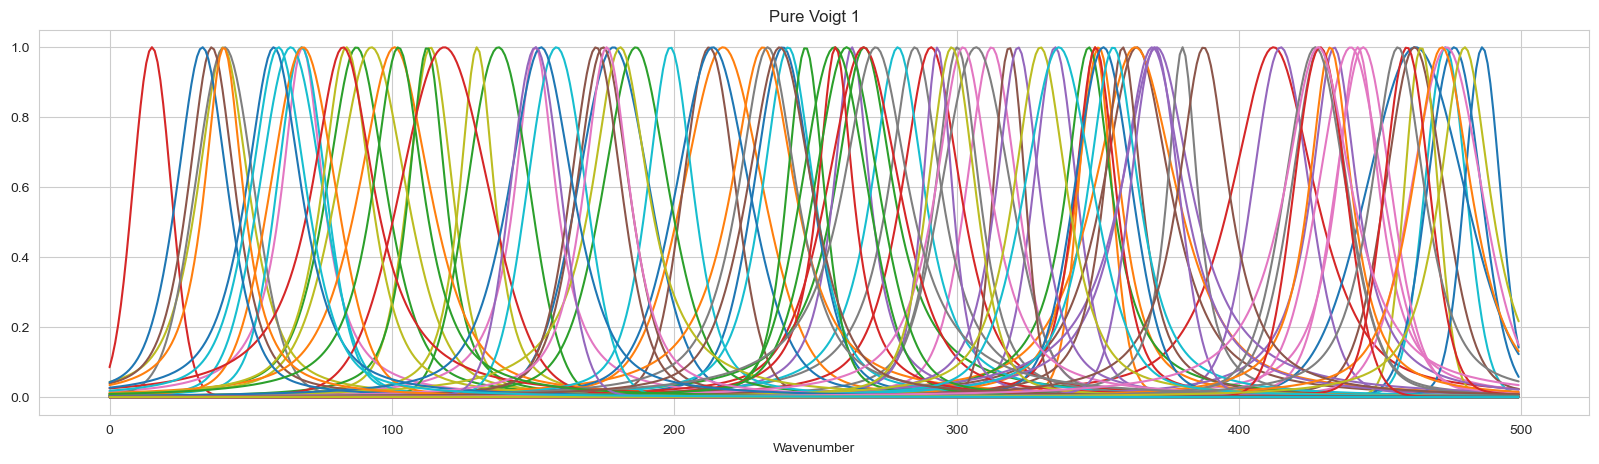

In [4]:
fig, ax = plt.subplots(figsize=(20,5))
for gen in gens:
    ax.plot(gen.Vp[0,:])
ax.set_xlabel('Wavenumber')
ax.set_title('Pure Voigt 1')
plt.show()

> The principal components are the columns of $A$.

> It can also return the transformed data, $S$ (also known as scores), which has the same size as $X$.

In [5]:
pca = PCA()
pca.fit(Xs)

A = pca.components_.T
S = pca.transform(Xs)

print('Xs shape:', Xs.shape)
print('PCs shape:', A.shape)
print('scores shape:', S.shape)

Xs shape: (40000, 500)
PCs shape: (500, 500)
scores shape: (40000, 500)


It takes 233 components to explain 95% of the total variance.


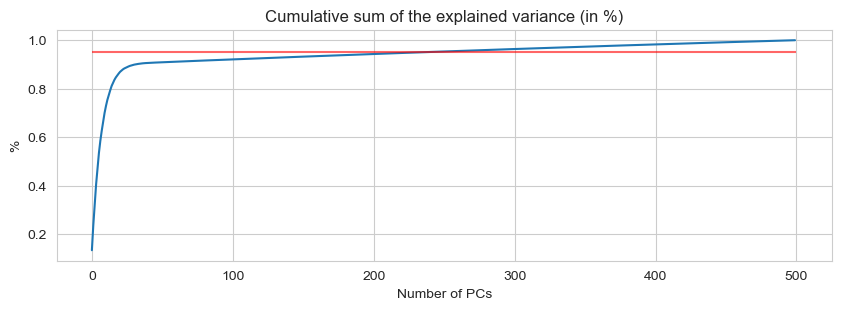

In [6]:
nb = next(x[0] for x in enumerate(np.cumsum(pca.explained_variance_ratio_)) if x[1] > 0.95)
print('It takes {} components to explain 95% of the total variance.'.format(nb))

fig, ax = plt.subplots(figsize=(10,3))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.hlines(0.95, xmin=0, xmax=500, color='r', alpha=0.6)
ax.set_title('Cumulative sum of the explained variance (in %)')
ax.set(xlabel='Number of PCs', ylabel='%')
plt.grid(True)
plt.show()

In [7]:
pca.explained_variance_ratio_.cumsum()[0:2]

array([0.13359394, 0.23594769])

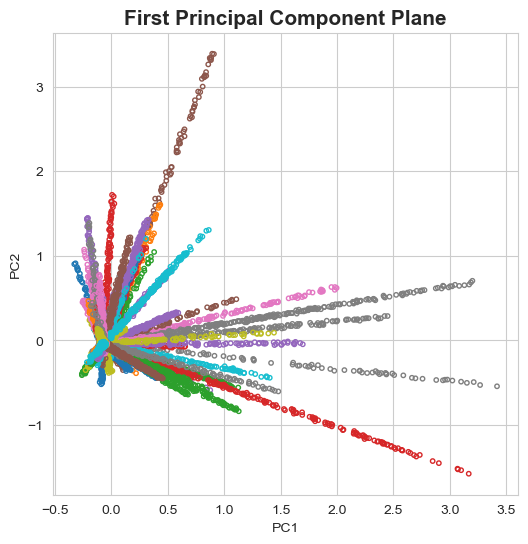

In [8]:
fig, ax = plt.subplots(figsize=(6,6))
for i in range(N):
    ax.scatter(S[i*400:(i+1)*400, 0],
               S[i*400:(i+1)*400, 1],
               s=10, marker='o', edgecolors=f'C{i}', facecolors='none', label=i)

ax.set_title('First Principal Component Plane', fontsize=15, fontweight='bold')
ax.set(xlabel='PC1', ylabel='PC2')
if N <= 10:
    plt.legend(title='Mappings')
plt.show()

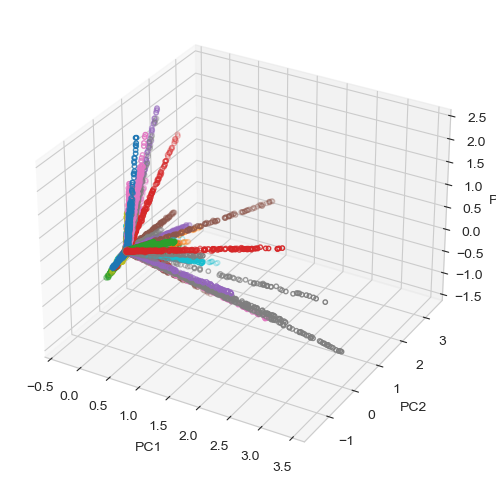

In [9]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
for i in range(N):
     ax.scatter(S[i*400:(i+1)*400,0],
                S[i*400:(i+1)*400,1],
                S[i*400:(i+1)*400,2],
                s=10, marker='o', edgecolors=f'C{i}', facecolors='none', label=i)
        
ax.set(xlabel='PC1', ylabel='PC2', zlabel='PC3')
        
plt.show()

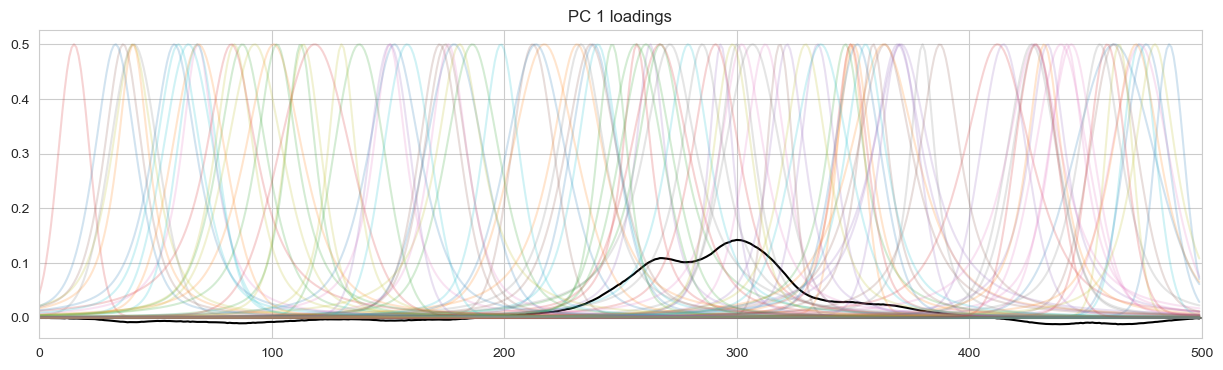

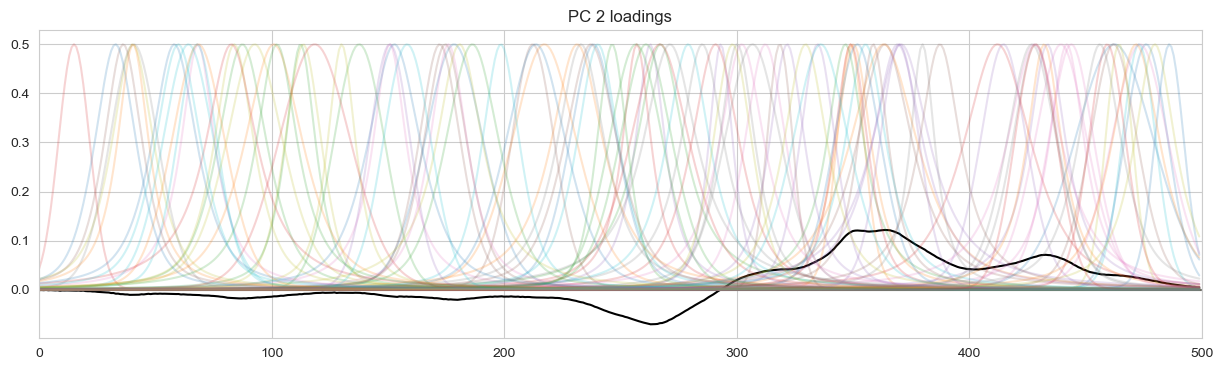

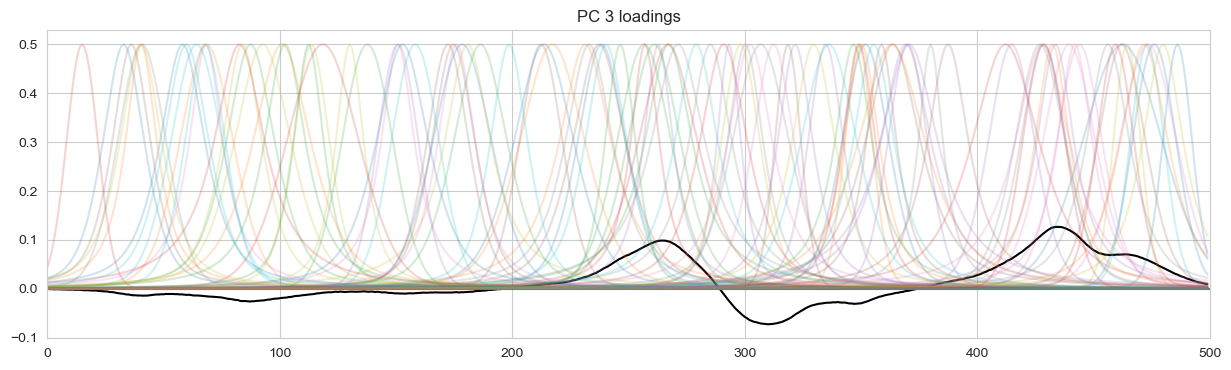

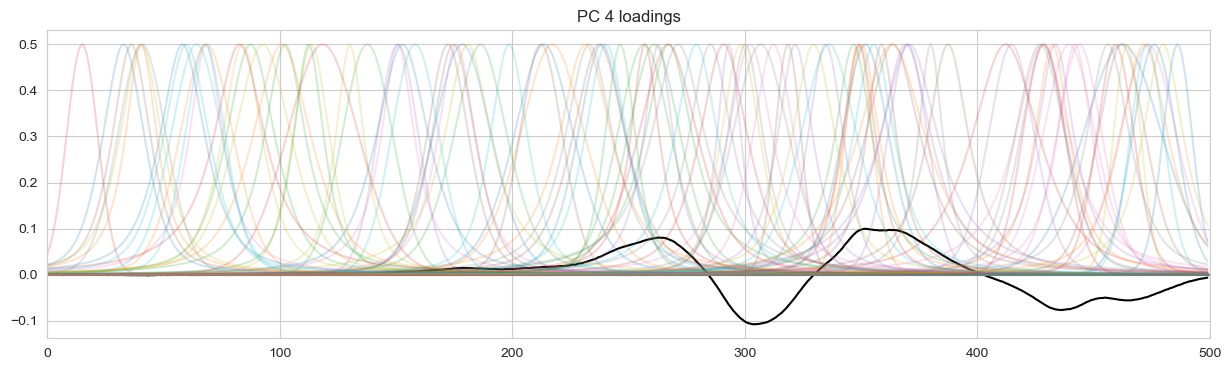

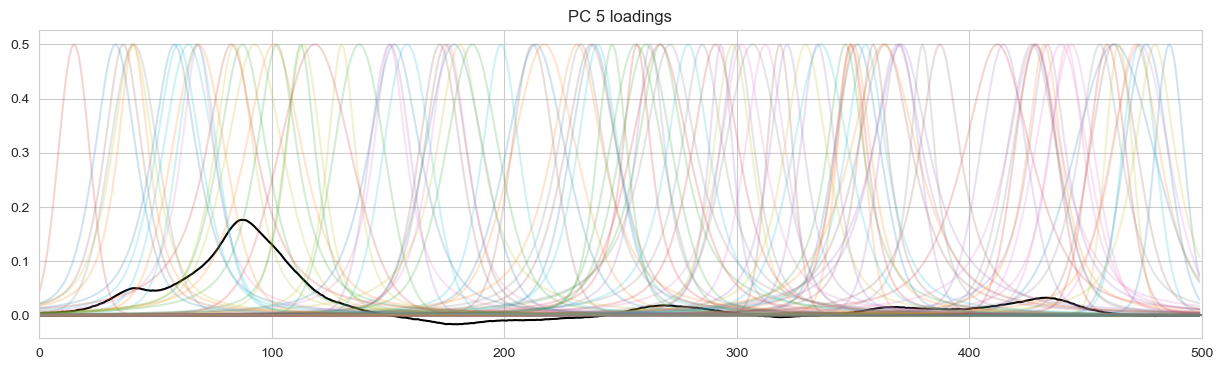

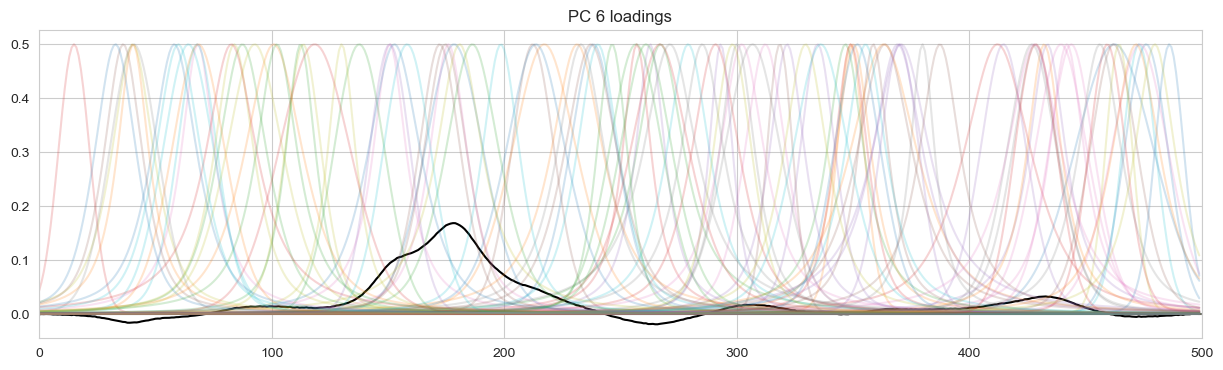

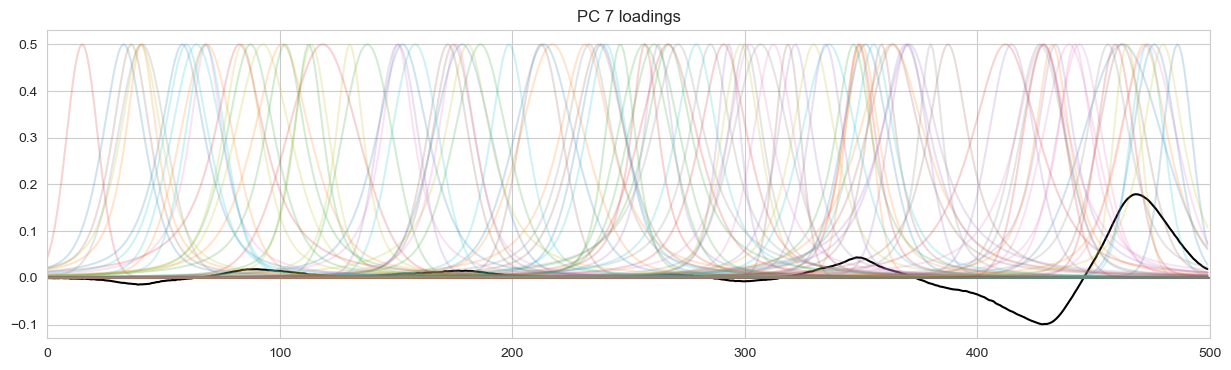

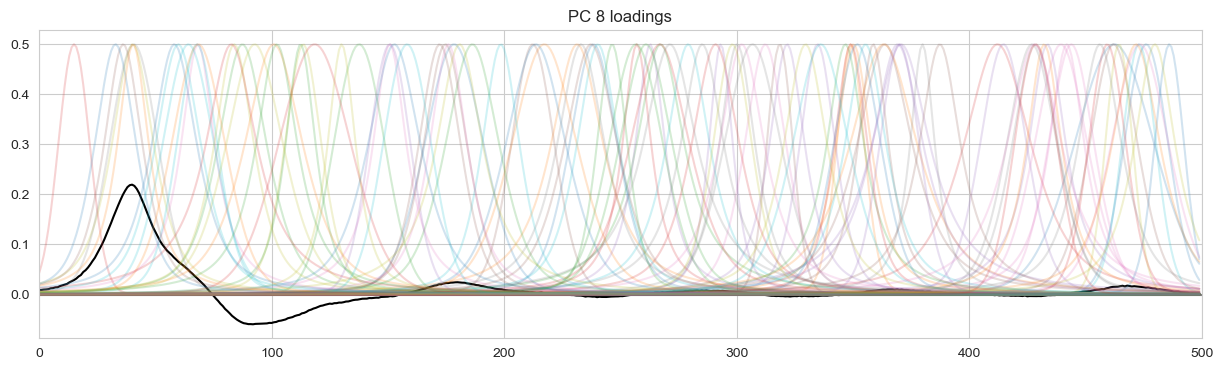

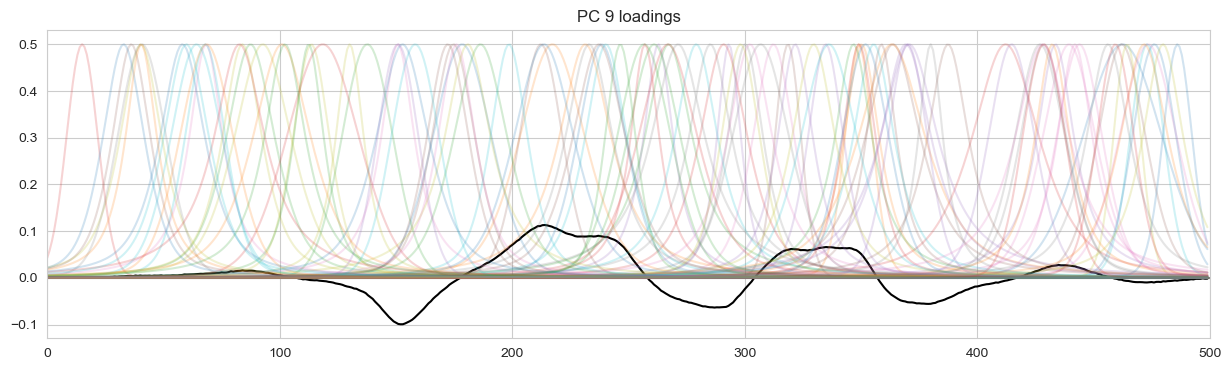

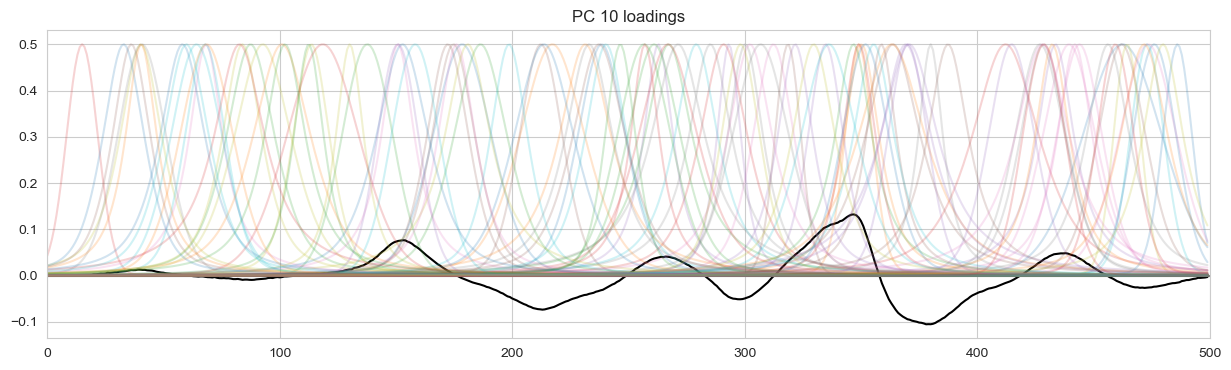

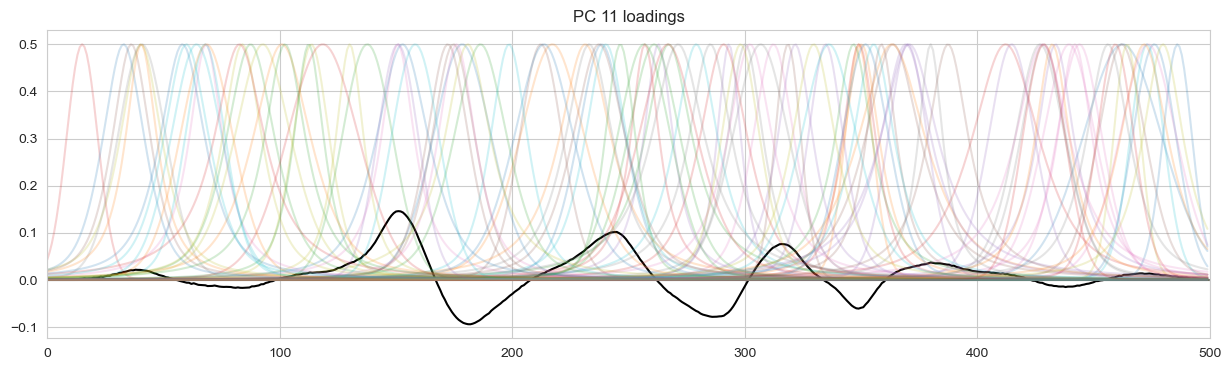

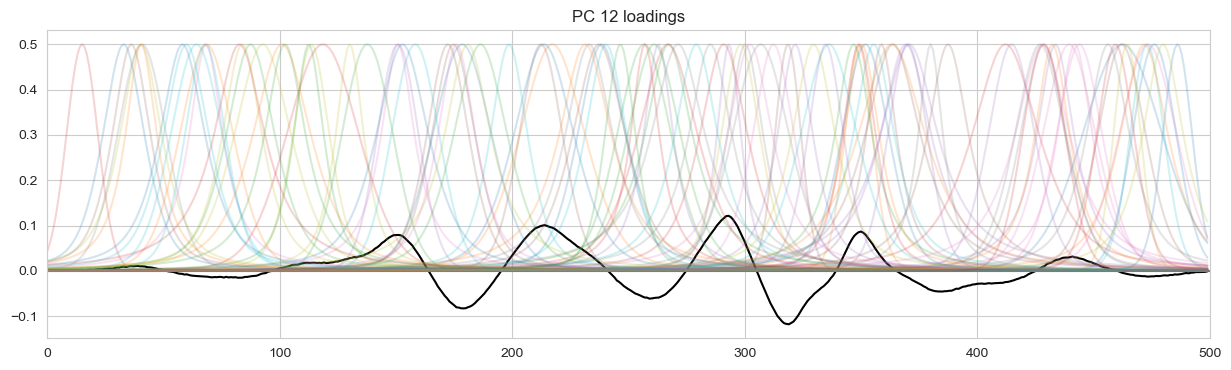

In [14]:
for i in range(12):
    fig, ax = plt.subplots(figsize=(15,4))
    #plt.bar(x=np.arange(0,500), height=A[:,i])
    plt.plot(A[:,i], color='black')
    plt.axhline(y=0, color='grey')
    
    #for gen in gens:
    #    plt.scatter(gen.c, 0.1, s= 100)
    
    for j, gen in enumerate(gens):
        ax.plot(0.5*gen.Vp[0,:], alpha=0.2, label=j)
        
    ax.set(title="PC {} loadings".format(i+1))
    ax.set_xlim([0,500])
    
    if N <= 10:
        plt.legend(title='Mappings')
    plt.show()

> Now reconstruct $X$ from $SA^{T}$ using only the first principal components.

In [11]:
SAT1 = np.dot(S[:,:1], A[:,:1].T)
SAT2 = np.dot(S[:,:2], A[:,:2].T)
SAT3 = np.dot(S[:,:3], A[:,:3].T)
SAT4 = np.dot(S[:,:4], A[:,:4].T)
SAT5 = np.dot(S[:,:5], A[:,:5].T)
SAT6 = np.dot(S[:,:6], A[:,:6].T)

SAT10 = np.dot(S[:,:10], A[:,:10].T)

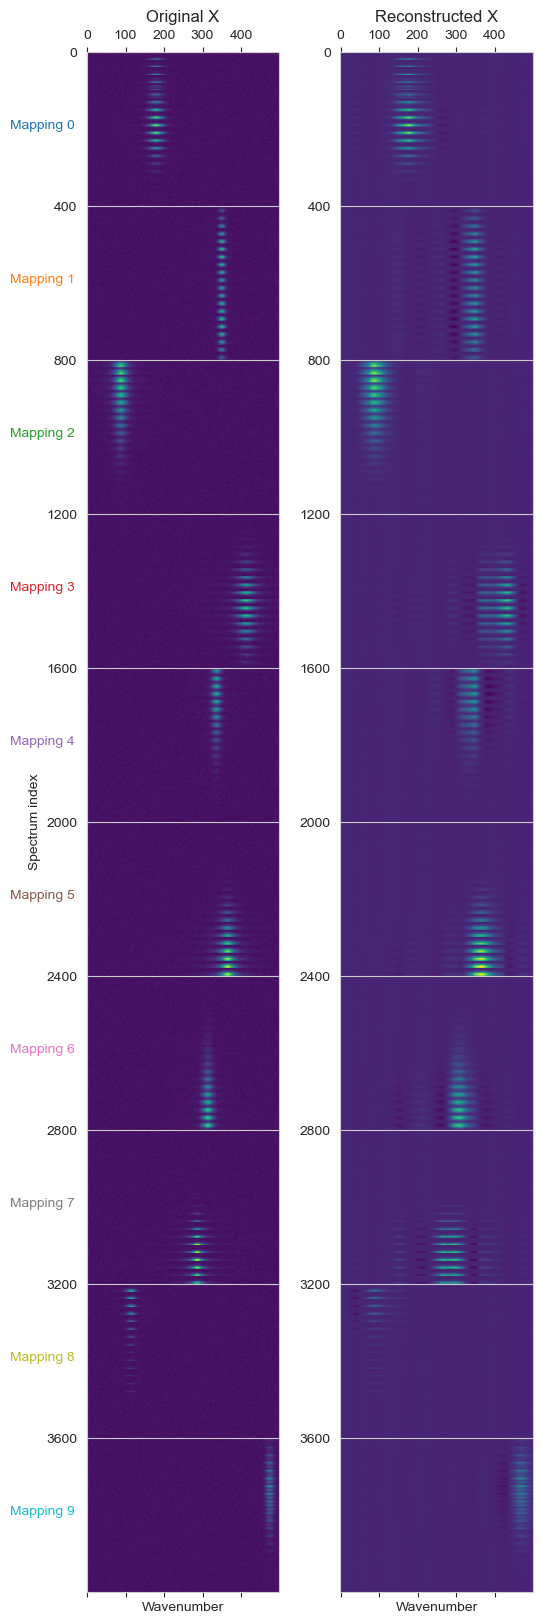

In [15]:
# Dataset Matrix
fig, axes = plt.subplots(1,2, figsize=(6,20))

K = 10

# Original
ax = axes[0]
mappable = ax.matshow(Xs[0:K*400,:], cmap='viridis')
ax.set_xlabel('Wavenumber')
ax.set_ylabel('Spectrum index')
ax.set_title('Original X')
ax.yaxis.set_major_locator(MultipleLocator(400))
ax.grid(which='major', axis='x')
#plt.colorbar(mappable=mappable, ax=ax)

for i in range(min(K,N)):
    ax.text(-200, 200+(i*400), f'Mapping {i}', fontsize=10, c=f'C{i}')

# Reconstructed
ax = axes[1]
mappable = ax.matshow(SAT10[0:K*400,:], cmap='viridis')
ax.set_xlabel('Wavenumber')
ax.set_title('Reconstructed X')
ax.yaxis.set_major_locator(MultipleLocator(400))
ax.grid(which='major', axis='x')
#plt.colorbar(mappable=mappable, ax=ax)

plt.show()